In [2]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#importing data from the file folder

df=pd.read_csv("/content/drive/MyDrive/Dataset/fake news/train_news.csv")
df.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [5]:
# summary of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20800 non-null  int64 
 1   id          20800 non-null  int64 
 2   headline    20242 non-null  object
 3   written_by  18843 non-null  object
 4   news        20761 non-null  object
 5   label       20800 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 975.1+ KB


In [6]:
#Concatenate two columns of dataframe which play important role in predicting fake news 

df['News'] = df['headline'].str.cat(df['news'], sep =" ") 

In [7]:
#Removing the feature (we won’t use it for the analysis)

df=df.drop(["Unnamed: 0","id","written_by","headline","news"],axis=1)

In [8]:
# dropping null value
df=df.dropna()

In [9]:
# new shape of dataframe after dropping null value and feature
df.shape

(20203, 2)

In [10]:
# overview final dataset which is used for prediction
df.head(10)

,label,News
0,0,Ethics Questions Dogged Agriculture Nominee as...
1,0,U.S. Must Dig Deep to Stop Argentina’s Lionel ...
2,0,Cotton to House: ’Do Not Walk the Plank and Vo...
3,0,"Paul LePage, Besieged Maine Governor, Sends Co..."
4,1,A Digital 9/11 If Trump Wins Finian Cunningh...
5,1,Whatever the Outcome on November 8th the US Wi...
6,0,Rapid Evolution Saved This Fish From Pollution...
7,1,Alabama Prison Officials Retaliate Against Pri...
9,1,Can We Live in a Constant State of Love? Leave...
10,1,Is Hillary a Closet Drunk… New WikiLeak Email ...


In [11]:
# resetting index
df.reset_index(inplace=True)

In [12]:
df.head(10)

,index,label,News
0,0,0,Ethics Questions Dogged Agriculture Nominee as...
1,1,0,U.S. Must Dig Deep to Stop Argentina’s Lionel ...
2,2,0,Cotton to House: ’Do Not Walk the Plank and Vo...
3,3,0,"Paul LePage, Besieged Maine Governor, Sends Co..."
4,4,1,A Digital 9/11 If Trump Wins Finian Cunningh...
5,5,1,Whatever the Outcome on November 8th the US Wi...
6,6,0,Rapid Evolution Saved This Fish From Pollution...
7,7,1,Alabama Prison Officials Retaliate Against Pri...
8,9,1,Can We Live in a Constant State of Love? Leave...
9,10,1,Is Hillary a Closet Drunk… New WikiLeak Email ...


In [13]:
# checking for any null value
df.isnull().sum()

index    0
label    0
News     0
dtype: int64

In [14]:
# overview 8 index row
df['News'][8]

'Can We Live in a Constant State of Love? Leave a reply \nToni Emerson – When we fall in love, our heart becomes full of feel-good qualities that infuse our life with joy and excitement. Everything feels light, fresh and more vibrant. We wake up to a brighter day, the air is warmer, the sun is brighter, everything is right with the world. \nLiving life through the interactive and colorful kaleidoscope of love is one of the highest human experiences . Wouldn’t it be fantastic to capture this experience and transform it into a permanent state of being? In my next few articles, we will formulate our unique blueprint to reconnect to our love source and transition from experiences of love which come and go to living love at its fullest moment to moment. Love & Emotions \nUnderstanding the difference between love and the many feelings inspired by love is essential in realizing that love is the baseline from which everything else emerges. \nAs human beings, we experience many emotional states

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [17]:
# data preprocessing convert the text to lowercase, remove punctuation and remove stopwords
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['News'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [18]:
# view index 8 row after preprocess
corpus[8]

'live constant state love leav repli toni emerson fall love heart becom full feel good qualiti infus life joy excit everyth feel light fresh vibrant wake brighter day air warmer sun brighter everyth right world live life interact color kaleidoscop love one highest human experi fantast captur experi transform perman state next articl formul uniqu blueprint reconnect love sourc transit experi love come go live love fullest moment moment love emot understand differ love mani feel inspir love essenti realiz love baselin everyth els emerg human be experi mani emot state love vast umbrella yet one fail convey total love love equal sum part far power transient emot integr state wait rediscov deepli nourish emot usher love stand merit offer specif gift emot assist us reach full potenti human deepen interior faculti also give us human qualiti propel us action help other need make world better world love ambassador love ambassador enrich life experi increas rang percept love ambassador compass j

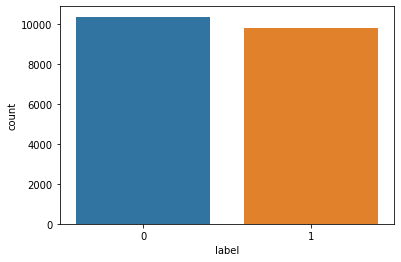

In [19]:
#How many fake and real news?

sns.countplot(df['label'])

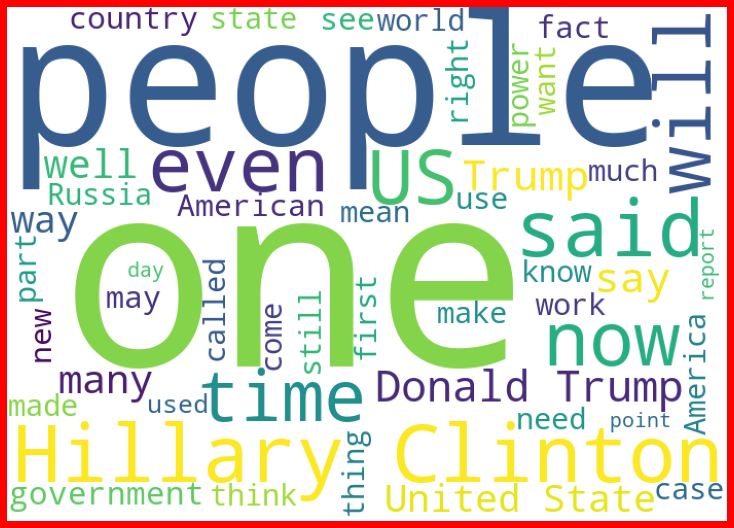

In [20]:
#Word Cloud for fake news

from wordcloud import WordCloud

fake = df['News'][df['label']==1]
fake_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(fake))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

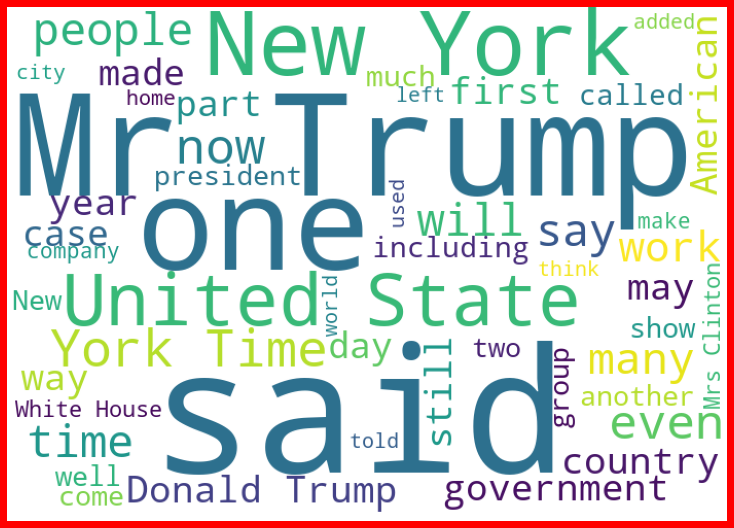

In [21]:
#Word Cloud for real news 

real = df['News'][df['label']==0]

real_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(real))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(real_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [22]:
from nltk import tokenize
token_space = tokenize.WhitespaceTokenizer()
def counter(News, column_text, quantity):
    all_words = ' '.join([News for News in News[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

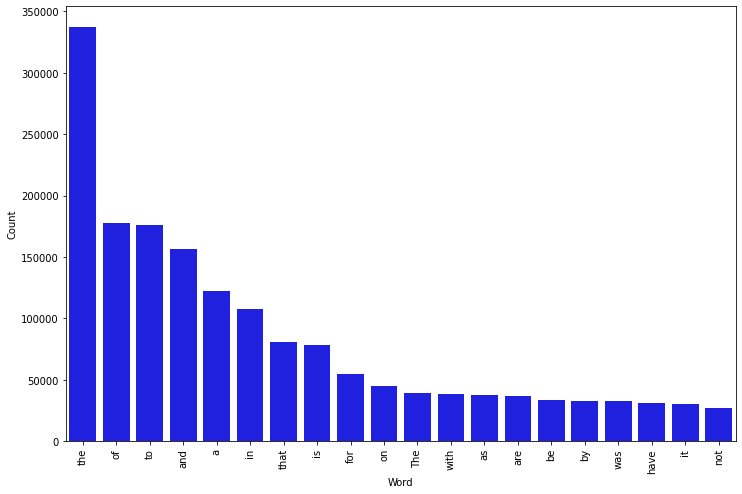

In [23]:
#Most frequent words in fake news 

counter(df[df["label"] == 1],"News",20)

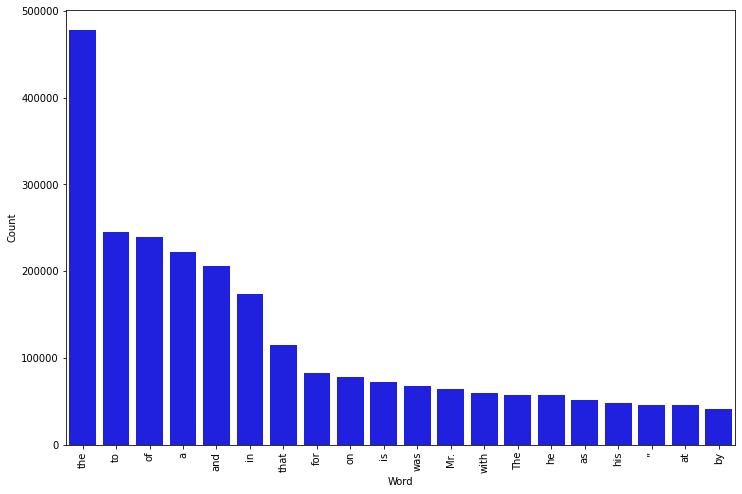

In [24]:
# Most frequent words in real news
counter(df[df["label"] == 0],"News",20)

In [25]:
#importing required modelling techniques and metrics for evaluation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score,roc_curve

In [26]:
x=df.drop("label",axis=1)

In [27]:
y=df['label']

In [28]:
#The modeling process will consist of vectorizing the corpus stored in the “News” column, 
# then applying TF-IDF, and finally a classification machine learning algorithm.

from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
x=tf.fit_transform(corpus).toarray()

In [29]:
x.shape

(20203, 5000)

In [30]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

In [31]:
tf.get_feature_names()[:20]

['aaron',
 'abandon',
 'abc',
 'abe',
 'abedin',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc',
 'absolut',
 'absorb',
 'absurd',
 'abu',
 'abus',
 'academ',
 'academi',
 'acceler',
 'accept',
 'access']

In [32]:
tf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [33]:
count_news= pd.DataFrame(x_train, columns=tf.get_feature_names())

In [34]:
count_news.head()

,aaron,abandon,abc,abe,abedin,abil,abl,abort,abroad,absenc,absolut,absorb,absurd,abu,abus,academ,academi,acceler,accept,access,access pipelin,accid,accident,accommod,accompani,accomplish,accord,accord report,account,accumul,accur,accus,achiev,acid,acknowledg,acquir,acr,across,across countri,act,...,wrong,wrongdo,wrote,wrote twitter,www,xi,yahoo,yard,ye,yeah,year,year ago,year later,year mr,year old,year said,year sinc,yell,yellow,yemen,yesterday,yet,yet anoth,yiannopoulo,yield,york,york citi,york time,york time washington,yorker,young,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034616,0.000000,0.043670,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.040635,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.091371,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.014228,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.084077,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.016113,0.167037,0.0,0.000000,0.0,0.0,0.016695,0.0,0.0,0.0,0.0,0.007392,0.0,0.010195,0.0,0.000000,0.010471,0.012917,0.0,0.000000,0.016227,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.029238,0.018653,0.00000,0.0,0.0,0.0,0.0,0.0,0.038096,0.0,0.030183,0.016213,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.008930,0.0,0.0,0.0,0.019500,0.0,0.006974,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.015841,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.008878,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.012856,0.0,0.0,0.0,0.006381,0.0,0.0,0.0,0.009288,0.0,0.004983,0.010381,0.0,0.000000,0.0,0.0,0.0,0.000000,0.010624,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.30329,0.0,0.0,0.0,0.0,0.0,0.050972,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.283776,0.000000,0.0,0.0,0.0,0.0


--------------------------------------------LogisticRegression---------------------------------------------------
Accuracy Score for LogisticRegression: 95.5602%
Confusion Matrix
[[3293  180]
 [ 116 3078]]


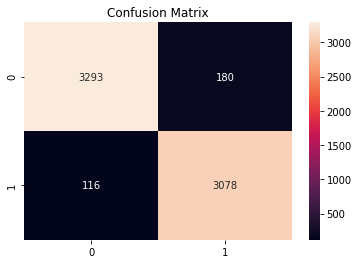

None
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3473
           1       0.94      0.96      0.95      3194

    accuracy                           0.96      6667
   macro avg       0.96      0.96      0.96      6667
weighted avg       0.96      0.96      0.96      6667

--------------------------------------------DecisionTree---------------------------------------------------
Accuracy Score for DecisionTree: 93.8353%
Confusion Matrix
[[3255  218]
 [ 193 3001]]


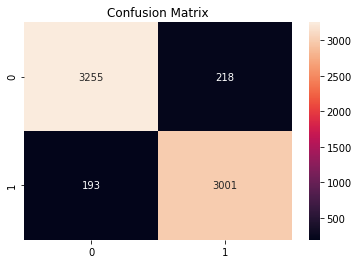

None
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3473
           1       0.93      0.94      0.94      3194

    accuracy                           0.94      6667
   macro avg       0.94      0.94      0.94      6667
weighted avg       0.94      0.94      0.94      6667

--------------------------------------------RandomForest---------------------------------------------------
Accuracy Score for RandomForest: 96.3552%
Confusion Matrix
[[3300  173]
 [  70 3124]]


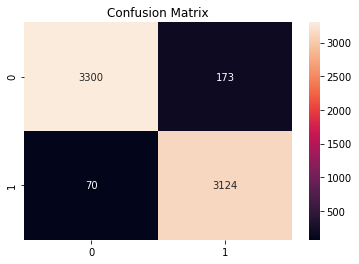

None
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      3473
           1       0.95      0.98      0.96      3194

    accuracy                           0.96      6667
   macro avg       0.96      0.96      0.96      6667
weighted avg       0.96      0.96      0.96      6667

--------------------------------------------Naive---------------------------------------------------
Accuracy Score for Naive: 87.7306%
Confusion Matrix
[[3084  389]
 [ 429 2765]]


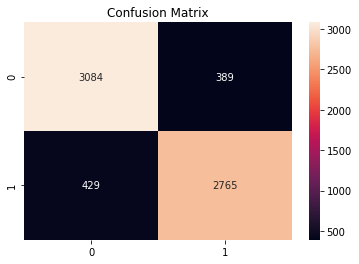

None
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      3473
           1       0.88      0.87      0.87      3194

    accuracy                           0.88      6667
   macro avg       0.88      0.88      0.88      6667
weighted avg       0.88      0.88      0.88      6667



In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,auc

lr= LogisticRegression()
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()
gnb = GaussianNB()

models = {lr:'LogisticRegression',
          tree:'DecisionTree',
          forest: 'RandomForest',
          gnb: 'Naive'}


def train(algo,name,x_train,y_train,x_test,y_test):
    algo.fit(x_train,y_train)
    y_pred = algo.predict(x_test)
    score = accuracy_score(y_test,y_pred)
    print(f"--------------------------------------------{name}---------------------------------------------------")
    print(f"Accuracy Score for {name}: {score*100:.4f}%")
    return y_test,y_pred,score

def acc_res(y_test,y_pred):
    print("Confusion Matrix")
    matrix = confusion_matrix(y_test,y_pred)
    print(matrix)
    sns.heatmap(matrix, annot=True, fmt='d')
    plt.title('Confusion Matrix')
    print(plt.show())
    print("Classification Report")
    print(classification_report(y_test,y_pred))
    
def main(models):
    accuracy_scores = []
    for algo,name in models.items():
        y_test_train,y_pred,acc_score = train(algo,name,x_train,y_train,x_test,y_test)
        acc_res(y_test_train,y_pred)
        accuracy_scores.append(acc_score)
        
    return accuracy_scores
    
accuracy_scores = main(models)

From the above results it is observed that Random Forest is the best performing model. By comparing all metrics score, random forest is observed to be the best so it would be good to used for predicting fake news detection. The accuracy score of random forest is 96.35%. So hyperparameter tuning for best estimators that is random forest.


In [36]:
#hyperparameter tuning for best estimators

rfc=RandomForestClassifier()
parameters={'n_estimators':[10,100,500,1000]}
grid=GridSearchCV(rfc,parameters,cv=5)
grid.fit(x,y)
grid.best_params_

{'n_estimators': 1000}

In [37]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
predictions = rfc.predict(x_test)

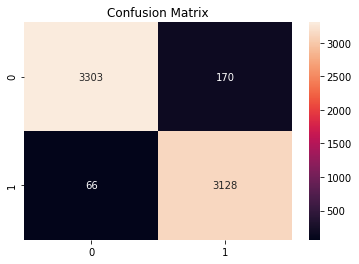

In [39]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [40]:
# Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      3473
           1       0.95      0.98      0.96      3194

    accuracy                           0.96      6667
   macro avg       0.96      0.97      0.96      6667
weighted avg       0.97      0.96      0.96      6667



In [41]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.9646017699115044
Precision = 0.9484536082474226
Recall = 0.9793362554790231
F1 Score = 0.9636475662353666


ROC AUC = 0.9943676786719122


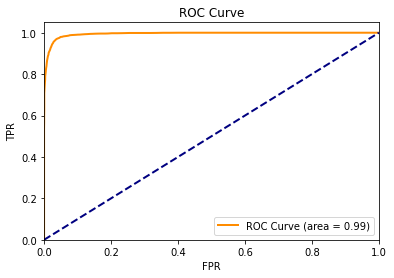

In [42]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = rfc.predict_proba(x_test)
fpr,tpr,threshold = roc_curve(y_test,ypred[:,1])
roc_auc = roc_auc_score(y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [43]:
#saving the model
from sklearn.externals import joblib
joblib.dump(rfc,'rfc_fake_news.pkl')

['rfc_fake_news.pkl']

**Conclusion**

I choose RandomForestClassifier as my final model because it give good accuracy_score.

Accuracy = 0.9646017699115044

Precision = 0.9484536082474226

Recall = 0.9793362554790231

F1 Score = 0.9636475662353666